# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from PythonAflevering1 import HouseholdSpecializationModelClass

model = HouseholdSpecializationModelClass()

# Question 1

**Explain how you solve the model**

In [22]:


sol_q1 = []

alphas = [0.25, 0.50, 0.75] #alpha værdierne defineres i en liste
sigmas = [0.5, 1.0, 1.5] #sigma værdierne defineres i en liste

for a in alphas:
    for s in sigmas:
        model_q1 = HouseholdSpecializationModelClass()
        model_q1.par.alpha = a #Vi sætter vores værdi for alpha ind i modellen
        model_q1.par.sigma = s #Vi sætter vores værdi for sigma ind i modellen
        opt = model_q1.solve_discrete() #Modellen løses
        HFHM1 = opt.HF/opt.HM #Forholdet mellem HF og HM genereres
        print(f"alpha = {a:.3f}, sigma = {s:.3f}, forhold = {HFHM1:.3f}") #Løsningen printes
        sol_q1.append(HFHM1)
        

alpha = 0.250, sigma = 0.500, forhold = 0.545
alpha = 0.250, sigma = 1.000, forhold = 0.308
alpha = 0.250, sigma = 1.500, forhold = 0.214
alpha = 0.500, sigma = 0.500, forhold = 1.000
alpha = 0.500, sigma = 1.000, forhold = 1.000
alpha = 0.500, sigma = 1.500, forhold = 1.000
alpha = 0.750, sigma = 0.500, forhold = 1.833
alpha = 0.750, sigma = 1.000, forhold = 3.250
alpha = 0.750, sigma = 1.500, forhold = 4.667


# Question 2

Explain your code and procedure

In [24]:

#wF værdier sættes i en liste
var_wF_q2 = [0.8,0.9,1.0,1.1,1.2]

#Tom liste laves til værdierne
sol_wF_q2 = []
sol_HFHM_q2 = []


for w in var_wF_q2:
    model_q2 = HouseholdSpecializationModelClass()
    model_q2.par.wF = w # wF sættes ind i modellen
    opt_q2 = model_q2.solve_discrete()


    HFHM = opt_q2.HF/opt_q2.HM #HFHM forhold defineres
    sol_HFHM_q2.append(HFHM)


    WFWM = w/model_q2.par.wM # vi finder forholdet mellem wF og wM
    sol_wF_q2.append(WFWM) #Forholdet sættes i listen
    #print(f"forhold = {WFWM:.3f}") # Forholdet printes


log_sol_wF_q2 = np.log(sol_wF_q2) # Der tages log til forholdene
log_sol_HFHM_q2 = np.log(sol_HFHM_q2) 

print(log_sol_wF_q2) # De printes for at se resultater
print(log_sol_HFHM_q2)

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[ 0.22314355  0.          0.         -0.11778304 -0.22314355]


In [6]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

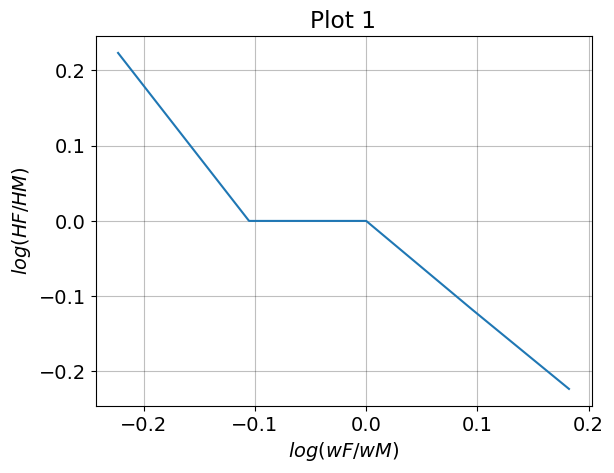

In [25]:
# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_sol_wF_q2,log_sol_HFHM_q2)

ax.set_title('Plot 1')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');

# Question 3

Explain your code and procedure

In [26]:
from scipy.optimize import minimize
model_q3 = HouseholdSpecializationModelClass()
result = model_q3.solve_continously()
print(result)
#res1 = model.solve_wF_vec()
#print(res1)

var_WF_q3 = [0.8,0.9,1.0,1.1,1.2]

list_HFHM_q3 = []
list_WFWM_q3 = []

for w in var_WF_q3 :
    model_q3 = HouseholdSpecializationModelClass()
    model_q3.par.wF = w
    opt_q3 = model_q3.solve_continously()
    
    
    HFHM = model_q3.sol.HF/model_q3.sol.HM #HFHM forhold defineres
    list_HFHM_q3.append(HFHM)
    
    
    WFWM = w/model_q3.par.wM # vi finder forholdet mellem wF og wM
    list_WFWM_q3.append(WFWM)

log_sol_WFWM_q3 = np.log(list_WFWM_q3) # Der tages log til forholdene
log_sol_HFHM_q3 = np.log(list_HFHM_q3)

print(log_sol_WFWM_q3) # De printes for at se resultater
print(log_sol_HFHM_q3) 

None
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[ 2.25199585e-01  9.75472906e-05  2.15435980e-09 -8.68013145e-05
 -1.86626258e-01]


In [27]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

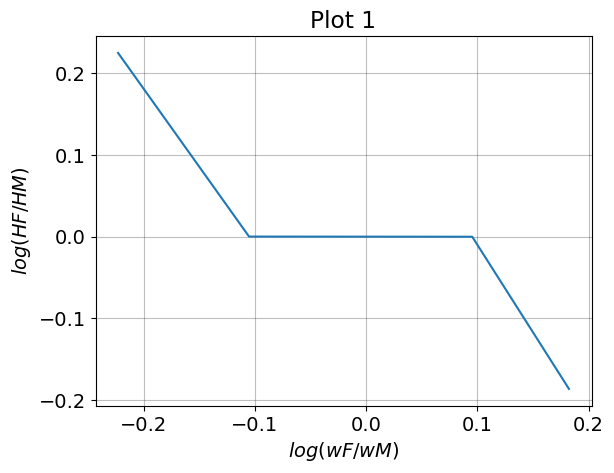

In [28]:
# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_sol_WFWM_q3,log_sol_HFHM_q3)

ax.set_title('Plot 1')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');

Opgave 4

In [18]:
model_q4 = HouseholdSpecializationModelClass()
# solve_wF_vec has the same function as in q3



var_WF_q4 = [0.8,0.9,1.0,1.1,1.2]

for w in var_WF_q4 :
    model_q4.solve_continously()
    #res_cont_q4 = model_q4.solve_continously()
    res_wF_q4 = model_q4.solve_wF_vec()
    res_reg_q4 = model_q4.run_regression()
    










[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[ 2.25199585e-01  9.75472906e-05  2.15435980e-09 -8.68013145e-05
 -1.86626258e-01]


LinAlgError: 0-dimensional array given. Array must be two-dimensional

ADD CONCISE CONLUSION.